In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [12]:
all_files = glob.glob('./data/' +'/results_class_*.txt')

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

res_file =  pd.concat(li, axis=0, ignore_index=True)
res_file.head(20)

./data/results_class_2019-07-02.txt


,lang,topK,isbert,correct%
0,en,1,False,0.73145
1,en,1,True,0.69258
2,en,2,False,0.84452
3,en,2,True,0.78799
4,en,3,False,0.86572
5,en,3,True,0.83392
6,sv,1,False,0.73721
7,sv,1,True,0.58377
8,sv,2,False,0.84303
9,sv,2,True,0.69841


In [13]:
all_lang = set(res_file['lang'])
all_lang

{'en', 'no', 'sv'}

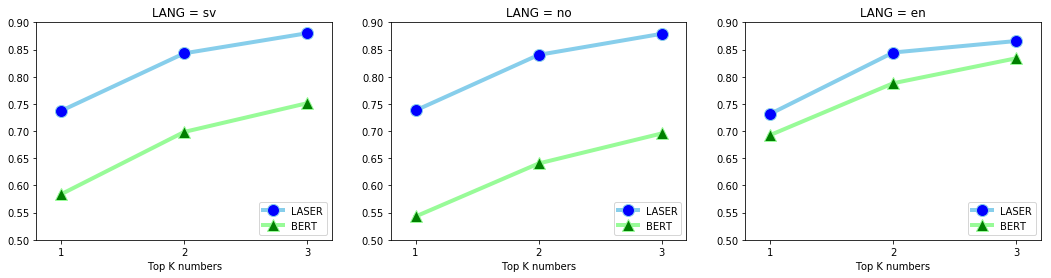

In [14]:
#### draw a plot
%matplotlib inline
plt.figure(figsize=(18, 4))
i=1
for lang in all_lang:
    x = 100+len(all_lang)*10+i
    
    plt.subplot(x)
    plt.plot( 'topK', 'correct%', data=res_file[(res_file['isbert']==False) & (res_file['lang'] == lang)], marker='o', markerfacecolor='blue', markersize=12, 
             color='skyblue', linewidth=4, label='LASER')
    plt.plot( 'topK', 'correct%', data=res_file[(res_file['isbert']==True) & (res_file['lang'] == lang)], marker='^', markerfacecolor='green', markersize=12,
             color='palegreen', linewidth=4, label='BERT')
    plt.ylim(0.5, 0.9);
    plt.xlim(0.8, 3.2);
    plt.xticks(np.arange(1, 4, 1.0))#### min, max, step
    plt.xlabel('Top K numbers')
    plt.legend(loc=4)
    plt.gca().set_title('LANG = {}'.format(lang))
    i = i + 1
    #plt.savefig('./data/result_class_{:s}.png'.format(lang))

plt.savefig('./data/result_class.png')
#plt.close()